# 지도 학습: 회귀
지도 학습문제는 회귀와 분류의 문제로 나눌 수 있다.

1.회귀는 입력에 대해 연속적인 값을 대응시키는 문제

2.불류는 입력에 대해 순서가 없는 클래스(라벨)를 대응시키는 문제

## 1차원 입력 직선 모델

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#데이터 생성
np.random.seed(seed = 1) #난수 고정
X_min = 4
X_max = 30
X_n = 15
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X ) + 4*np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)
print(T) # 키
print(np.round(T,2)) # 소수점 2자리까지 표현
print("\n")
print(X) # 나이
print(np.round(X,2)) # 소수점 2자리까지 표현

[161.62207327 176.00659218 125.85028276 161.96247    153.18289074
 142.69486784 157.26427906 164.43280437 166.67062764 166.94612169
 172.77033348 170.03139223 160.27333968 164.98921546 131.95341   ]
[161.62 176.01 125.85 161.96 153.18 142.69 157.26 164.43 166.67 166.95
 172.77 170.03 160.27 164.99 131.95]


[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983]
[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68]


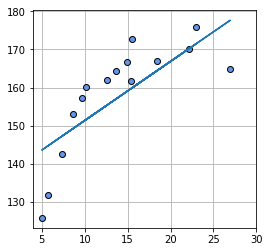

In [20]:
# 그래프 표현

def predict_line(x):
  pred = 135.87+ 1.55*x
  return pred
plt.figure(figsize=(4,4))
plt.plot(X,T,marker='o', linestyle='None',markeredgecolor='black', color = 'cornflowerblue')
plt.plot(X,predict_line(X)) # 직선모델
plt.xlim(X_min, X_max) # x축 범위 조정
plt.grid(True) 
plt.show()



## 5.1.2 제곱 오차 함수

데이터에 부합한다.

-> 데이터 = 경험 = 증거

증거에 기반한다는 의미이다.



73.904638965685
178279.98280902547


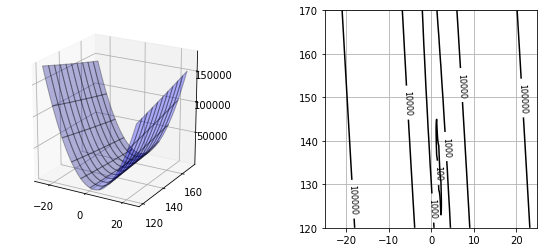

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# 평균 오차 함수
def mse_line(x, t, w):
  y = w[0]*x + w[1]
  mse = np.mean((y-t)**2)
  return mse

# 계산
xn = 100 
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
  for i1 in range(xn):
      J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
      
print(J.min())
print(J.max())
      
# 표시
plt.figure(figsize= (9.5,4))
plt.subplots_adjust(wspace= 0.5)

ax =plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1, J, rstride=10, cstride=10, alpha=0.3,color='blue', edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont = plt.contour(xx0,xx1,J,30,colors='black',levels = [100, 1000, 10000,100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()

In [0]:
# 평균 제곱 오차의 기울기
def dmse_line(x, t, w):
  y = w[0]*x +w[1]
  d_w0 = 2*np.mean((y-t)*x)
  d_w1 = 2*np.mean(y-t)
  return d_w0, d_w1

In [23]:
# w = [10,165]의 기울기 
d_w = dmse_line(X, T, [10,165])
print(np.round(d_w, 1))

[4725.9  291.8]


In [31]:
print(type(W_history))


<class 'numpy.ndarray'>


반복 횟수 13623
W = [1.727671,134.419223]
dMSE=-0.005954,0.099978
MSE = 73.868348


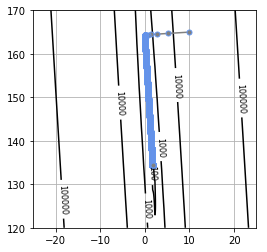

In [38]:
# 경사 하강법
def fit_line_num(x,t):
  w_init = [10.0, 165.0]
  alpha = 0.001
  i_max = 100000
  eps = 0.1
  w_i = np.zeros([i_max, 2])
  w_i[0,:] = w_init
  for i in range(1,i_max):
    dmse = dmse_line(x,t,w_i[i-1])
    w_i[i,0] = w_i[i-1, 0] - alpha*dmse[0]
    w_i[i,1] = w_i[i-1, 1] - alpha*dmse[1]
    if max(np.absolute(dmse)) < eps:
      break
      
  w0 = w_i[i,0]
  w1 = w_i[i,1]
  w_i = w_i[:i,:]
  return w0, w1, dmse, w_i

# 메인
plt.figure(figsize= (4,4))
xn = 100 
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
  for i1 in range(xn):
      J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

cont = plt.contour(xx0,xx1,J,30,colors='black',levels = [100, 1000, 10000,100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)


# 경사 하강법 호출
W0, W1, dMSE, W_history= fit_line_num(X,T)


# 결과 보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W = [{0:.6f},{1:.6f}]'.format(W0,W1))
print('dMSE={0:.6f},{1:.6f}'.format(dMSE[0], dMSE[1]))
print('MSE = {0:.6f}'.format(mse_line(X,T,[W0,W1])))
plt.plot(W_history[:, 0], W_history[:,1], '.-', color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

## 5.1.4 선형 모델 매개 변수의 해석해

